In [23]:
!pip install PyDrive


In [0]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:

download = drive.CreateFile({'id': '1RVoKzP6IeulTmuLRg6cgsoVEr3RcJAe-'})
download.GetContentFile('d2c_data.tar')

In [27]:
!ls

adc.json      my_mode4.h5  x_test.pickle   y_test.pickle
d2c_data.tar  sample_data  x_train.pickle  y_train.pickle


# Loading Images and Normalization

### Importing Necessary Libraries

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pickle
import xlrd

## Reading 'training.csv'

#### Make a set of Image Names and their corresponding Bounding Box Coordinates

In [0]:
# To get their (images) locations
folder = os.getcwd()
parent = os.path.abspath(os.path.join(folder, os.pardir))
im_loc = [parent, '/images']
im_loc = ''.join(im_loc)

# To get the location of 'training.csv'
data_loc = [parent,'/training.xlsx']
data_loc = ''.join(data_loc)
data = xlrd.open_workbook(data_loc)
sheet = data.sheet_by_index(0) # This will allow us to extract out the image names from 'training.csv'

train = []
image_stack = []
box_stack = []

for i in range(sheet.nrows-1):

    image = sheet.cell_value(i+1,0)
    img_loc = ''.join([im_loc,'/',image])

    exists = os.path.isfile(img_loc)

    # Since we'll later resize the images from 640x480 to 100x100, we have to modify the coordinates accordingly
    sx = 100 
    sy = 100

    x1 = int(np.ceil(((sx/640))*int(sheet.cell_value(i+1,1))))
    x2 = int(np.ceil(((sx/640))*int(sheet.cell_value(i+1,2))))
    y1 = int(np.ceil(((sy/480))*int(sheet.cell_value(i+1,3))))
    y2 = int(np.ceil(((sy/480))*int(sheet.cell_value(i+1,4))))
    
    #Converting the box corner coordinates into center coordinates and box width & height
    w = x2-x1
    h = y2-y1
    x = (x1+x2)/2
    y = (y1+y2)/2
    
    target = [x,y,w,h]
    
    if exists: # Checking if any such image actually xists in the 'images' folder so to save ourselves from future distress
        image_name_stack.append(image)
        box_stack.append(target)
        train.append(image, target)

        # Just for Progress Check
        if np.remainder(i,1000)==0:
            print("{} Images swooped".format(i))

FileNotFoundError: ignored

In [0]:
# Simplifying the 'pickling' process as we'll need this quite often
def pickleIn(name):    
    # 'name' - name of the file we wish to load (should be a string, eg. 'train_batch.pickle')
    pickle_in = open(name,'rb')
    return pickle.load(pickle_in)

def pickleOut(name, to_be_stored):
    # 'name' - name of the file we wish to store (should be a string, eg. 'train_batch.pickle')
    # 'to_be_stored' - the variable of which we'll be making the "pickle" 
    pickle_out = open(name,'wb')
    pickle.dump(to_be_stored, pickle_out)
    pickle_out.close

In [0]:
pickleOut('train.pickle', train) # Makes a pickle out of the variable 'train' and stores into local storage

NameError: ignored

## Loading Images and Noramlization

In [0]:
loc = "C:\\Users\\npl\\Desktop\\Divyanshu\\Competition\\Dare2Complete\\Round_2\\images\\"

X = [] # To store all the training Images
y = [] # To store all the training targets

i = 0

for image, target in train:
    im_loc = [loc, image] 
    im_loc = ''.join(im_loc)
    
    im = cv2.imread(im_loc, cv2.IMREAD_GRAYSCALE) # Reads the images as grayscale
    im = cv2.resize(im, (100,100)) # Resize from 640x480 to 100x100
    
    X.append(im/255) # Append images into X while also normalizing them (by dividing by 255)
    y.append(target) # Append targets into y
    
    i += 1     

    if np.remainder(i, 500) == 0:
        print(i)

NameError: ignored

#### 'Pickling' of dataset into storage

##### Pickling is done in smaller chunks so that whole RAM isn't used up at once by this particular process. 

In [0]:
pickleOut('X[0_2000].pickle',X[0:2000])

In [0]:
pickleOut('X[2000_4000].pickle',X[2000:4000])

In [0]:
pickleOut('X[4000_6000].pickle',X[4000:6000])

In [0]:
pickleOut('X[6000_8000].pickle',X[6000:8000])

In [0]:
pickleOut('X[8000_10000].pickle',X[8000:10000])

In [0]:
pickleOut('X[10000_12000].pickle',X[10000:12000])

In [0]:
pickleOut('X[12000_14000].pickle',X[12000:14000])

In [0]:
pickleOut('y.pickle',y)

# Training

### Importing Necessary Libraries

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten,ZeroPadding2D, Convolution2D, AveragePooling2D
from keras import regularizers
import keras.backend as K

### Loading X and Y from 'X_and_y.tar'

In [0]:
!tar -x -f d2c_data.tar

In [32]:
!ls

adc.json      my_mode4.h5  x_test.pickle   y_test.pickle
d2c_data.tar  sample_data  x_train.pickle  y_train.pickle


In [0]:
!ls

adc.json      sample_data    x_train.pickle  y_train.pickle
d2c_data.tar  x_test.pickle  y_test.pickle


In [0]:
loc = ''

X = []
for i in range(7):
    name = [loc,'X[',str(2000*i),'_',str(2000*(i+1)),'].pickle']
    name = ''.join(name)
    X.append(pickleIn(name))
    print('Batch {} appended'.format(i))
    
yloc = [loc, 'y.pickle'].p

yloc = ''.join(yloc)
y = pickleIn(yloc)    

FileNotFoundError: ignored

In [0]:
%matplotlib inline
print(y[13999])
plt.imshow(X[6][0].reshape(100,100),cmap='gray')

IndexError: ignored

## Train-Test Set Preparation

### Making of 4-D Array to store images

In [0]:
Whole = np.zeros((14000,100,100,1))

In [0]:
k = 0
for i in range(7):
    for j in range(2000):
        Whole[k,:,:,:] = X[i][j].reshape(100,100,1)
        k += 1

IndexError: ignored

0.6251694117647058


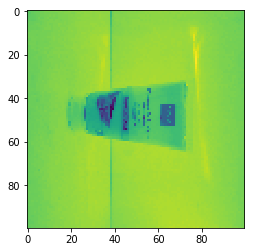

In [0]:
%matplotlib inline
plt.imshow(X[0][0].reshape(100,100))
print(np.mean(Whole[0,:,:,:]))

In [0]:
pickleOut('Whole_4D.pickle', Whole)

NameError: ignored

In [0]:
Whole = pickleIn('Whole_4D.pickle')

In [0]:
y = pickleIn('y.pickle')

FileNotFoundError: ignored

### Converting 'y' from 'list' to 'NumPy array' 

In [0]:
y_ = np.zeros((14000, 4))

for i in range(14000):
    y_[i,0] = y[i][0]
    y_[i,1] = y[i][1]
    y_[i,2] = y[i][2]
    y_[i,3] = y[i][3]

IndexError: ignored

In [0]:
x_train = Whole[0:12000, :,:,:]
x_test = Whole[12000:14000, :,:,:]
y_train = y_[0:12000,:] 
y_test = y_[12000:14000,:]

NameError: ignored

In [0]:
y_test.shape

(2000, 4)

### Storing Train-Test Set in Local Memory

In [0]:
pickleOut('x_train.pickle', x_train)
pickleOut('y_train.pickle', y_train)
pickleOut('x_test.pickle',  x_test)
pickleOut('y_test.pickle',  y_test)

NameError: ignored

In [0]:
x_train = pickleIn('x_train.pickle')
y_train = pickleIn('y_train.pickle')
x_test  = pickleIn('x_test.pickle')
y_test = pickleIn('y_test.pickle')

In [0]:
x_train_new = np.zeros((13500,100,100,1))
y_train_new = np.zeros((13500,4))
x_test_new = np.zeros((500,100,100,1))
y_test_new = np.zeros((500,4))

x_train_new[0:12000,:,:,:] = x_train
x_train_new[12000:13500,:,:,:] = x_test[0:1500,:,:,:]

x_test_new = x_test[1500:2000,:,:,:]

y_train_new[0:12000,:] = y_train
y_train_new[12000:13500,:] = y_test[0:1500,:]

y_test_new = y_test[1500:2000,:]


(13500, 100, 100, 1)

In [35]:
!ls

adc.json      my_mode4.h5  x_test.pickle   y_test.pickle
d2c_data.tar  sample_data  x_train.pickle  y_train.pickle


## Our Model(s)

###### Potential IOU Procedures

###### Number 1 (Mine)
'''
Custom Metrics for keras
def iou(y_true, y_pred):
   
    x_t = tf.constant(y_true[0])
    y_t = tf.constant(y_true[1])
    w_t = tf.constant(y_true[2])
    h_t = tf.constant(y_true[3])
    
    # Calculating the Co-ordinates from Center and Length Values (Actual Square)
    x1_t = tf.math.divide(tf.math.subtract(tf.math.multiply(2,x_t),w_t),2)
    y1_t = tf.math.divide(tf.math.subtract(tf.math.multiply(2,y_t),h_t),2)
    x2_t = tf.math.divide(tf.math.add(tf.math.multiply(2,x_t),w_t),2)
    y2_t = tf.math.divide(tf.math.add(tf.math.multiply(2,h_t),h_t),2)
    
    x_p = tf.constant(y_pred[0])
    y_p = tf.constant(y_pred[1])
    w_p = tf.constant(y_pred[2])
    h_p = tf.constant(y_pred[3])
    
    # Calculating the Co-ordinates from center and length values (Prediction Square)
    x1_p = tf.math.divide(tf.math.subtract(tf.math.multiply(2,x_p),w_p),2)
    y1_p = tf.math.divide(tf.math.subtract(tf.math.multiply(2,y_p),h_p),2)
    x2_p = tf.math.divide(tf.math.add(tf.math.multiply(2,x_p),w_p),2)
    y2_p = tf.math.divide(tf.math.add(tf.math.multiply(2,h_p),h_p),2)
    
    # Calculating the co-ordinates of intersecting square
    x1 = tf.maximum((x1_t, x1_p), axis=None, keepdims=False)
    y1 = tf.maximum((y1_t, y1_p), axis=None, keepdims=False)
    x2 = tf.minimum((x2_t, x2_p), axis=None, keepdims=False)
    y2 = tf.minimum((y2_t, y2_p), axis=None, keepdims=False)
    
    # Area of Intersection
    I_area = tf.math.multiply(tf.math.subtract(x2,x1),tf.math.subtract(y2-y1))
    
    true_area = tf.math.multiply(tf.math.subtract(x2_t,x1_t),tf.math.subtract(y2_t,y1_t))
    pred_area = tf.math.multiply(tf.math.subtract(x2_p,x1_p),tf.math.subtract(y2_p,y1_p))
    
    # Union of both regions
    U_area = tf.math.subtract(tf.math.add(true_area, pred_area), I_area)
        
    # Intersection over Union
    IOU = tf.math.divide(I_area,U_area)
    
    return IOU
    
    
'''

###### Number 2 
'''
def castF(x):
    return K.cast(x, K.floatx())

def castB(x):
    return K.cast(x, bool)

def iou_loss_core(true,pred):  #this can be used as a loss if you make it negative
    intersection = true * pred
    notTrue = 1 - true
    union = true + (notTrue * pred)

    return (K.sum(intersection, axis=-1) + K.epsilon()) / (K.sum(union, axis=-1) + K.epsilon())

def competitionMetric2(true, pred): #any shape can go - can't be a loss function

    tresholds = [0.5 + (i*.05)  for i in range(10)]

    #flattened images (batch, pixels)
    true = K.batch_flatten(true)
    pred = K.batch_flatten(pred)
    pred = castF(K.greater(pred, 0.5))

    #total white pixels - (batch,)
    trueSum = K.sum(true, axis=-1)
    predSum = K.sum(pred, axis=-1)

    #has mask or not per image - (batch,)
    true1 = castF(K.greater(trueSum, 1))    
    pred1 = castF(K.greater(predSum, 1))

    #to get images that have mask in both true and pred
    truePositiveMask = castB(true1 * pred1)

    #separating only the possible true positives to check iou
    testTrue = tf.boolean_mask(true, truePositiveMask)
    testPred = tf.boolean_mask(pred, truePositiveMask)

    #getting iou and threshold comparisons
    iou = iou_loss_core(testTrue,testPred) 
    truePositives = [castF(K.greater(iou, tres)) for tres in tresholds]

    #mean of thressholds for true positives and total sum
    truePositives = K.mean(K.stack(truePositives, axis=-1), axis=-1)
    truePositives = K.sum(truePositives)

    #to get images that don't have mask in both true and pred
    trueNegatives = (1-true1) * (1 - pred1) # = 1 -true1 - pred1 + true1*pred1
    trueNegatives = K.sum(trueNegatives) 

    return (truePositives + trueNegatives) / castF(K.shape(true)[0])
'''

### Model!! ('model')

 ''',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))'''

In [0]:
from keras.layers.normalization import BatchNormalization

# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(64, input_dim=14, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer    
model.add(Dense(64, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(2, init='uniform'))
model.add(BatchNormalization())
model.add(Dense(4))

# setting up the optimization of our weights 
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

# running the fitting
model.fit(X_train, y_train, nb_epoch=20, batch_size=16, show_accuracy=True, validation_split=0.2, verbose = 2)

In [0]:
# conv3
    for i in range(4):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv4
    for i in range(6):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 1024, _strides=strides)

    # conv5
    for i in range(3):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 1024, 2048, _strides=strides)

        

In [0]:
from keras import layers
from keras import models


#
# image dimensions
#

img_height = 100
img_width = 100
img_channels = 1

#
# network params
#

cardinality = 32


def residual_network(x):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y

    # conv1
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 128, 256, _project_shortcut=project_shortcut)
    #conv3
    x = layers.Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)

    

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(4)(x)

    return x


image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = residual_network(image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.95, beta_2=0.999, epsilon=.00000001, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

model.fit(x_train_new, y_train_new,
          batch_size=120,
          epochs=30,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 13500 samples, validate on 500 samples
Epoch 1/30
13500/13500 [==============================] - 77s 6ms/step - loss: 8.6673 - acc: 0.3337 - val_loss: 0.1737 - val_acc: 0.4300
Epoch 2/30
13500/13500 [==============================] - 56s 4ms/step - loss: 0.0254 - acc: 0.5117 - val_loss: 0.0185 - val_acc: 0.6060
Epoch 3/30
13500/13500 [==============================] - 56s 4ms/step - loss: 0.0161 - acc: 0.6455 - val_loss: 0.0160 - val_acc: 0.6380
Epoch 4/30
13500/13500 [==============================] - 56s 4ms/step - loss: 0.0150 - acc: 0.6669 - val_loss: 0.0147 - val_acc: 0.6880
Epoch 5/30
 4320/13500 [========>.....................] - ETA: 37s - loss: 0.0146 - acc: 0.6896

In [0]:
model.fit(x_train_new, y_train_new,
          batch_size=120,
          epochs=15,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [39]:
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Conv2D(5, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,1)))
model.add(Conv2D(5, (3, 3), activation='relu'))
model.add(Conv2D(10, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(10, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(20, (3, 3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(15, (2, 2), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, (1, 1), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4))

batch_size = 120
epochs = 50

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=.00000001, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

model.fit(x_train_new, y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

13500/13500 [==============================] - 13s 950us/step - loss: 0.0095 - acc: 0.7979 - val_loss: 0.0130 - val_acc: 0.8140
Epoch 46/50
  240/13500 [..............................] - ETA: 12s - loss: 0.0088 - acc: 0.8125

KeyboardInterrupt: ignored

In [130]:
model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(Conv2D(5, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(100,100,1)))
model.add(Conv2D(5, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(BatchNormalization())
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(Conv2D(10, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1600, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4))

batch_size = 135
epochs = 50

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train_new, y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 13500 samples, validate on 500 samples
Epoch 1/50
13500/13500 [==============================] - 66s 5ms/step - loss: 0.0419 - acc: 0.6564 - val_loss: 0.0100 - val_acc: 0.8060
Epoch 2/50
13500/13500 [==============================] - 40s 3ms/step - loss: 0.0116 - acc: 0.7804 - val_loss: 0.0090 - val_acc: 0.8380
Epoch 3/50
13500/13500 [==============================] - 39s 3ms/step - loss: 0.0105 - acc: 0.8019 - val_loss: 0.0098 - val_acc: 0.8300
Epoch 4/50
13500/13500 [==============================] - 39s 3ms/step - loss: 0.0094 - acc: 0.8162 - val_loss: 0.0077 - val_acc: 0.8460
Epoch 5/50
13500/13500 [==============================] - 39s 3ms/step - loss: 0.0087 - acc: 0.8292 - val_loss: 0.0072 - val_acc: 0.8520
Epoch 6/50
13500/13500 [==============================] - 39s 3ms/step - loss: 0.0081 - acc: 0.8279 - val_loss: 0.0069 - val_acc: 0.8480
Epoch 7/50
13500/13500 [==============================] - 39s 3ms/step - loss: 0.0078 - acc: 0.8387 - val_loss: 0.0067 - val_acc: 

In [127]:
model.fit(x_train_new, y_train_new,
          batch_size=135,
          epochs=1,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 13500 samples, validate on 500 samples
Epoch 1/1
13500/13500 [==============================] - 28s 2ms/step - loss: 0.0012 - acc: 0.9282 - val_loss: 0.0042 - val_acc: 0.8920
Test loss: 0.004228291934356094
Test accuracy: 0.8919999990463257


In [93]:
model.fit(x_train_new, y_train_new,
          batch_size=135,
          epochs=2,
          verbose=1,
          validation_data=(x_test_new, y_test_new))
score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 13500 samples, validate on 500 samples
Epoch 1/2
13500/13500 [==============================] - 27s 2ms/step - loss: 0.0018 - acc: 0.9165 - val_loss: 0.0042 - val_acc: 0.8920
Epoch 2/2
13500/13500 [==============================] - 27s 2ms/step - loss: 0.0018 - acc: 0.9146 - val_loss: 0.0040 - val_acc: 0.8900
Test loss: 0.003980171348899603
Test accuracy: 0.8899999995231629


In [124]:
pred = model.predict(x_test_new)

IOU = np.zeros((500,1))

for i in range(500):
  IOU[i,0] = iou(y_test_new[i,:], pred[i,:])
  
print(np.mean(IOU))



0.8310020111113063


In [0]:
def iou(y_true, y_pred):

  x_t = y_true[0]
  y_t = y_true[1]
  w_t = y_true[2]
  h_t = y_true[3]

  # Calculating the Co-ordinates from Center and Length Values (Actual Square)
  x1_t = ((2*x_t) - w_t)/2
  y1_t = ((2*y_t) - h_t)/2
  x2_t = ((2*x_t) + w_t)/2
  y2_t = ((2*y_t) + h_t)/2

  x_p = y_pred[0]
  y_p = y_pred[1]
  w_p = y_pred[2]
  h_p = y_pred[3]

  # Calculating the Co-ordinates from center and length values (Prediction Square)
  x1_p = ((2*x_p) - w_p)/2
  y1_p = ((2*y_p) - h_p)/2
  x2_p = ((2*x_p) + w_p)/2
  y2_p = ((2*y_p) + h_p)/2

  # Calculating the co-ordinates of intersecting square
  x1 = max(x1_t,x1_p)
  y1 = max(y1_t,y1_p)
  x2 = min(x2_t,x2_p)
  y2 = min(y2_t,y2_p)

  # Area of Intersection
  I_area = (x2-x1)*(y2-y1)

  true_area = (x2_t-x1_t)*(y2_t-y1_t)
  pred_area = (x2_p-x1_p)*(y2_p-y1_p)

  # Union of both regions
  U_area = true_area + pred_area - I_area

  # Intersection over Union
  IOU = I_area/U_area

  return IOU

In [0]:
from keras.models import load_model
model.save('model_0038_83_1.h5')  # creates a HDF5 file 'my_model.h5'


In [0]:
upload = drive.CreateFile({'title':  'model_0038_83_1.h5'})
upload.SetContentFile('model_0038_83_1.h5')
upload.Upload()

In [0]:
!ls


adc.json      my_mode3.h5  x_test.pickle   y_test.pickle
d2c_data.tar  sample_data  x_train.pickle  y_train.pickle


## Upload weights over Google Drive

In [0]:
pred = model.predict(x_test[0:20,:,:,:], batch_size=None, verbose=0, steps=None)

In [0]:
print(pred)
pred.shape

[[0.461515   0.46832222 0.6646545  0.86366117]
 [0.4900547  0.47424704 0.16078061 0.73146963]
 [0.5066489  0.48252967 0.34943873 0.8118259 ]
 [0.5206109  0.5092855  0.5705287  0.6992403 ]
 [0.49113417 0.46084756 0.74124664 0.7876276 ]
 [0.45627138 0.40394503 0.560188   0.6628771 ]
 [0.4852527  0.4778113  0.47222722 0.8205329 ]
 [0.49408415 0.49885827 0.66369426 0.7373235 ]
 [0.49556896 0.4756223  0.42383897 0.513632  ]
 [0.4598997  0.53420705 0.9113124  0.5123726 ]
 [0.44397265 0.4348317  0.9041838  0.48331475]
 [0.52793354 0.442965   0.65437376 0.7749908 ]
 [0.5046363  0.48054296 0.8327973  0.8417196 ]
 [0.4899298  0.4934851  0.29752353 0.7210063 ]
 [0.529534   0.4796327  0.29335433 0.6420262 ]
 [0.55048716 0.48901725 0.5755739  0.47041574]
 [0.46807247 0.4874981  0.8294612  0.46987224]
 [0.47715417 0.53447956 0.65939134 0.37185448]
 [0.46615165 0.4882223  0.52729297 0.6090207 ]
 [0.4917695  0.55527043 0.88789934 0.9601669 ]]


(20, 4)

In [0]:
%matplotlib inline


28 70 21 73
25 74 17 74


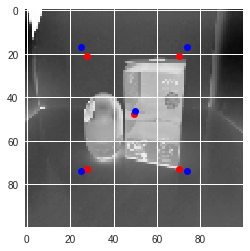

In [0]:
i = 8

some = x_test[i,:,:,:]

plt.imshow(some.reshape(100,100))
#plt.hold()
plt.plot(100*pred[i,0],100*pred[i,1],'ro')

x1_ = int(100*(2*pred[i,0] - pred[i,2])/2)
x2_ = int(100*(2*pred[i,0] + pred[i,2])/2)
y1_ = int(100*(2*pred[i,1] - pred[i,3])/2)
y2_ = int(100*(2*pred[i,1] + pred[i,3])/2)

print(x1_,x2_,y1_,y2_)

plt.plot(x1_,y1_,'ro')
plt.plot(x2_,y2_,'ro')
plt.plot(x2_,y1_,'ro')
plt.plot(x1_,y2_,'ro')

plt.plot(100*y_test[i,0],100*y_test[i,1],'bo')

x1_ = int(100*(2*y_test[i,0] - y_test[i,2])/2)
x2_ = int(100*(2*y_test[i,0] + y_test[i,2])/2)
y1_ = int(100*(2*y_test[i,1] - y_test[i,3])/2)
y2_ = int(100*(2*y_test[i,1] + y_test[i,3])/2)

print(x1_,x2_,y1_,y2_)

plt.plot(x1_,y1_,'bo')
plt.plot(x2_,y2_,'bo')
plt.plot(x2_,y1_,'bo')
plt.plot(x1_,y2_,'bo')


We'll be trying out different types of models via exploring their depth and architectures and see which one gives us best results

### LeNet-5 ( 'model1' )